In [1]:
# Install NBA API
!pip install nba_api

In [2]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dict_={'a':[11,21,31],'b':[12,22,32]}

In [7]:
df=pd.DataFrame(dict_)

In [8]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [10]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [15]:
# import stats from nba api
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [16]:
nba_teams=teams.get_teams()

In [18]:
nba_teams[0:3]
#The dictionary key id has a unique identifier for each team as a value,
#let's look at the first three elements of the list:

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [21]:
#To make things easier, we can convert the dictionary to a table. 
#First, we use the function one dict, to create a dictionary.
#We use the common keys for each team as the keys, the value is a list; 
#each element of the list corresponds to the values for each team. We then convert the dictionary to a dataframe, 
#each row contains the information for a different team.
nba_team_dic=one_dict(nba_teams)
df=pd.DataFrame(nba_team_dic)
df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [24]:
#Will use the team's nickname to find the unique id, 
#we can see the row that contains the warriors by using the column nickname as follows:
df_warriors=df[df['nickname']=='Warriors']
df_warriors.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [28]:
#we can use the following line of code to access the first column of the dataframe:
id_warriors=df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [29]:
#The function "League Game Finder " will make an API call, its in the module stats.endpoints
from nba_api.stats.endpoints import leaguegamefinder

In [30]:
#The parameter team_id_nullable is the unique ID for the warriors. 
#Under the hood, the NBA API is making a HTTP request.
#The information requested is provided and is transmitted via an HTTP response this is assigned to 
#the object gamefinder.

# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [39]:
#we can see the json file by running the following line of code.
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
#gamefinder.get_json()

In [32]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612744,GSW,Golden State Warriors,0022000177,2021-01-14,GSW @ DEN,L,240,104,...,0.708,5.0,38.0,43.0,29,9,4,19,25,-11.6
1,22020,1610612744,GSW,Golden State Warriors,0022000163,2021-01-12,GSW vs. IND,L,240,95,...,0.636,10.0,36.0,46.0,25,8,8,15,21,-3.6
2,22020,1610612744,GSW,Golden State Warriors,0022000148,2021-01-10,GSW vs. TOR,W,240,106,...,0.895,12.0,39.0,51.0,30,2,10,15,18,1.0
3,22020,1610612744,GSW,Golden State Warriors,0022000130,2021-01-08,GSW vs. LAC,W,240,115,...,0.833,9.0,29.0,38.0,25,13,3,15,19,0.2
4,22020,1610612744,GSW,Golden State Warriors,0022000116,2021-01-06,GSW vs. LAC,L,239,101,...,0.789,8.0,27.0,35.0,25,10,2,13,21,-7.0


In [34]:
#We can create two dataframes, one for the games that the Warriors faced the raptors at home 
#and the second for away games.
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [36]:
#We can calculate the mean for the column PLUS_MINUS for the dataframes games_home and  games_away
games_home.mean()['PLUS_MINUS']

3.2142857142857144

In [37]:
games_away.mean()['PLUS_MINUS']

-0.6071428571428571

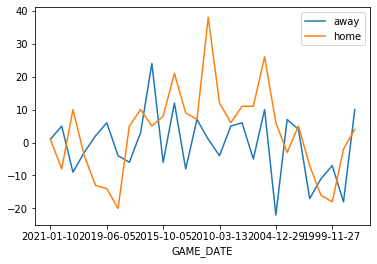

In [38]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()